In [ ]:
# Imports
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fnmatch import fnmatch
from pathlib import Path

In [ ]:
# Filepath where OUTPUT of macro is saved
# Please save results split by geltype (0.2kPa / soft and 20 kPa / stiff)
filepath_soft = r""
filepath_stiff = r""

p = Path(filepath_soft).absolute()
parent_dir = p.parents[0]

In [ ]:
# Open "Soft"-Datasets
root_soft = filepath_soft
pattern_Results = "*Results.csv"
pattern_Summary = "*SummaryParticles.txt"

df_X = pd.DataFrame()
df_Y = pd.DataFrame()

for path, subdirs, files in os.walk(root_soft):
    
    for name in files:
        if fnmatch(name, pattern_Results):
            df_X_ = pd.read_csv(os.path.join(path, name))
            df_X_["Name"] = name.rstrip("Results.csv")
            df_X_["Condition"] = "soft"
            df_X_["NormalizedMean_Accumulation"]= df_X_["Mean"]/df_X_.iloc[0, 3] #Normalized to first frame
            df_X = pd.concat([df_X, df_X_])
            
            
        if fnmatch(name, pattern_Summary):
            df_Y_ = pd.read_csv(os.path.join(path, name), delimiter="\t")
            df_Y_["Name"] = name.rstrip("SummaryParticles.txt")
            df_Y_["Condition"] = "soft"
            df_Y = pd.concat([df_Y, df_Y_])

df_X.reset_index(drop=True, inplace=True)            
df_split = df_Y.Slice.str.rsplit("t:", expand=True)
df_split = df_split[1].str.split("/100", expand=True)
df_Y["Slice"] = df_split[0]

In [ ]:
# Open "Stiff"-Datasets
root_stiff = filepath_stiff

for path, subdirs, files in os.walk(root_stiff):
    
    for name in files:
        if fnmatch(name, pattern_Results):
            df_X_ = pd.read_csv(os.path.join(path, name))
            df_X_["Name"] = name.rstrip("Results.csv")
            df_X_["Condition"] = "stiff"
            df_X_["NormalizedMean_Accumulation"] = df_X_["Mean"]/df_X_.iloc[0, 3]
            df_X = pd.concat([df_X, df_X_])
            
            
        if fnmatch(name, pattern_Summary):
            df_Y_ = pd.read_csv(os.path.join(path, name), delimiter="\t")
            df_Y_["Name"] = name.rstrip("SummaryParticles.txt")
            df_Y_["Condition"] = "stiff"
            df_Y = pd.concat([df_Y, df_Y_])

df_X.reset_index(drop=True, inplace=True)            
df_split = df_Y.Slice.str.rsplit("t:", expand=True)
df_split = df_split[1].str.split("/100", expand=True)
df_Y["Slice"] = df_split[0]

In [ ]:
# Create 3 tables : AccumulationCircle, Cell, Wound, Accumulation
df_AccumulationCircle = pd.DataFrame()
df_Cell = pd.DataFrame()
df_Wound = pd.DataFrame()
df_Accumulation = pd.DataFrame()

df_AccumulationCircle = df_X[df_X.Label.str.contains("AccumulationArea")]
df_Cell = df_X[df_X.Label.str.contains("CellArea")]
df_Cell.drop(["NormalizedMean_Accumulation"], axis=1, inplace=True)
df_Cell.reset_index(inplace=True)

df_Wound = df_X[df_X.Label.str.contains("WoundArea")]
df_Wound.drop(["NormalizedMean_Accumulation"], axis=1, inplace=True)
df_Wound.reset_index(inplace=True)

df_Accumulation = df_X[df_X.Label.str.contains("Wound:0")]

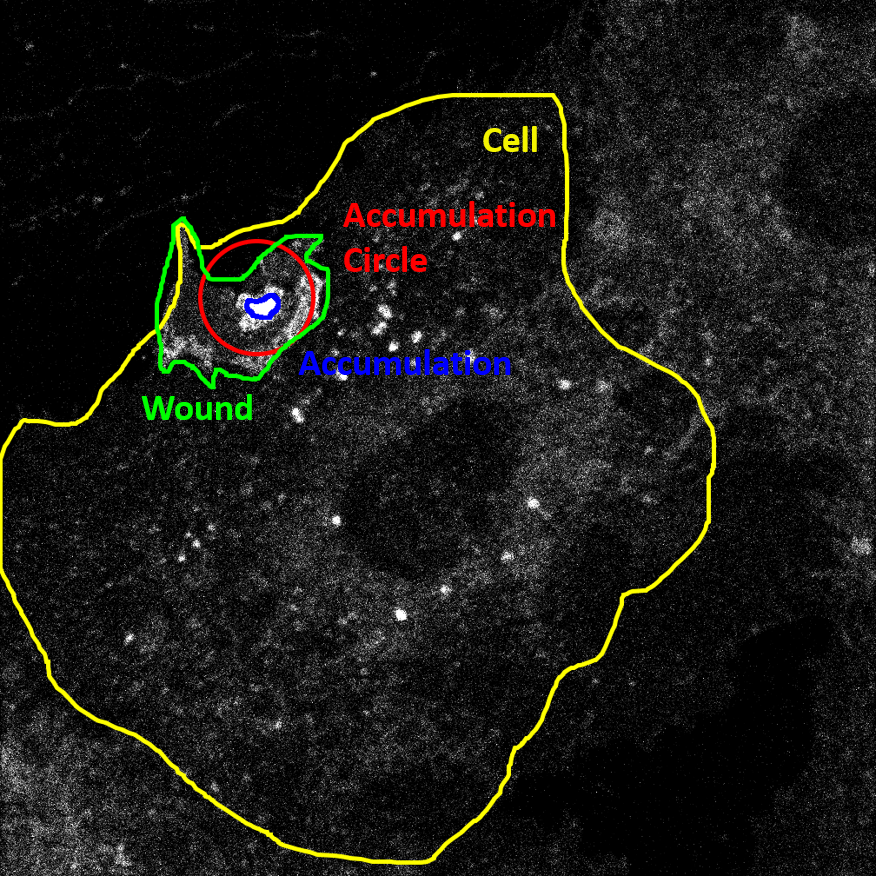

##### Available Measurements
1. Accumulation Circle
- Mean Intensity over time
- Normalized Mean Intensity over time

2. Wound
- Wound mean intensity normalized by cell mean intensity (first frame)
- Wound area normalized by cell area

3. Accumulation
- Accumulation Mean Intensity
- Mean Area

4. Whole Cell
- Mean intensity over time (control)

# 1. Accumulation Circle 
### 1.1 Mean Intensity

In [ ]:
# MeanIntensity: Mean of the mean intensity in the accumulation circle
# Normalized Mean Intensity: Mean of the Mean intensity normalized to first time point (first timepoint = 1)

In [ ]:
# errorbar choices:

In [ ]:
# Plot summarizing graph
ax= sns.relplot(data=df_AccumulationCircle, x="Slice", y="Mean", hue="Condition", kind="line", errorbar="se")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("Mean Intensity in Accumulation Circle")
plt.savefig(os.path.join(parent_dir, "MeanIntensityAccumulationCircle.tiff"), dpi=600, transparent=True, bbox_inches="tight", format="tiff")

In [ ]:
# Check why it's not starting at 1 . Should be because it's normalized to the first frame intensity!!!

In [ ]:
# Plot individual measurements per movie (maybe just to check if there are outliers)
ax= sns.relplot(data=df_AccumulationCircle, x="Slice", y="Mean", col="Condition", hue="Name", kind="line")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("Mean Intensity in Accumulation Circle")
plt.show()

### 1.2. Normalized Mean Intensity
normalized to first frame

In [ ]:
# Plot summarizing graph
ax= sns.relplot(data=df_AccumulationCircle, x="Slice", y="NormalizedMean_Accumulation", hue="Condition", kind="line", errorbar="se")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("Normalized Mean Intensity in Accumulation Circle")
plt.savefig(os.path.join(parent_dir, "NormalizedMeanIntensityAccumulationCircle.tiff"), dpi=600, transparent=True, bbox_inches="tight", format="tiff")

In [ ]:
# Plot individual measurements per movie (maybe just to check if there are outliers)
ax= sns.relplot(data=df_AccumulationCircle, x="Slice", y="NormalizedMean_Accumulation", col="Condition", hue="Name", kind="line")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("Mean Intensity in Accumulation Circle")
plt.show()

In [ ]:
# Summarize tables and save as excel
df_mean = df_AccumulationCircle.pivot_table(index="Slice", columns=["Condition"] , values=["Mean", "NormalizedMean_Accumulation"], aggfunc=['count', np.mean, np.median, np.std, np.min, np.max])
df_mean.to_excel(os.path.join(parent_dir, "AccumulationCircle_MeanIntensity.xlsx"))

# 2. Wound 
### 2.1 Wound mean intensity normalized by cell mean intensity

In [ ]:
grouped_Cell = df_Cell.groupby("Name")
first_frame_mean_cell = grouped_Cell["Mean"].transform("first")

In [ ]:
df_Wound["Mean_Normalized"] =df_Wound["Mean"] / first_frame_mean_cell
grouped = df_Wound.groupby("Name")
first_frame_mean = grouped["Mean_Normalized"].transform("first")
df_Wound["Mean_PercentageChange"] =df_Wound["Mean_Normalized"] / first_frame_mean

In [ ]:
df_mean = df_Wound.pivot_table(index="Slice", columns=["Condition"] , values=["Mean_PercentageChange"], aggfunc=['count', np.mean, np.median, np.std, np.min, np.max])
df_mean.to_excel(os.path.join(parent_dir, "Wound_MeanIntensity.xlsx"))

In [ ]:
# Plot summarizing graph
ax= sns.relplot(data=df_Wound, x="Slice", y="Mean_PercentageChange", hue="Condition", kind="line", errorbar="se")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("MWoundMeanIntensity/normalized to cell intensity first frame")

In [ ]:
# Plot individual measurements per movie (maybe just to check if there are outliers)
sns.relplot(data=df_Wound, x="Slice", y="Mean_PercentageChange", col="Condition", hue="Name", kind="line")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.show()

### 2.2 Wound area normalized by cell area

In [ ]:
# Wound size
df_Wound["WoundArea/CellArea"] = df_Wound["Area"]/df_Cell["Area"]
wound_size = df_Wound.loc[:, ["Area", "WoundArea/CellArea", "Name", "Condition"]].groupby(["Name"]).max()
wound_size.to_excel(os.path.join(parent_dir, "Wound_Size.xlsx"))

In [ ]:
sns.stripplot(data=wound_size, y="WoundArea/CellArea", x="Condition")
plt.title("Woundarea at last frame (normalized to cellarea)")
plt.savefig(os.path.join(parent_dir, "WoundSizeNormalizedToCell.tiff"), dpi=600, transparent=True, bbox_inches="tight", format="tiff")

# 4. Whole Cell

### 4.1. Intensity (control plot)

In [ ]:
df_cell_mean = df_Cell.pivot_table(index="Slice", columns="Condition", values="Mean")

In [ ]:
#Normalized
grouped_Cell = df_Cell.groupby("Name")
first_frame_mean_cell = grouped_Cell["Mean"].transform("first")
df_Cell["Mean_RelativeChange"] =df_Cell["Mean"] / first_frame_mean_cell

In [ ]:
# Plot individual measurements per movie (maybe just to check if there are outliers)
sns.relplot(data=df_Cell, x="Slice", y="Mean_RelativeChange", col="Condition", hue="Name", kind="line")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("Cell Intensity, relative change to first frame")
plt.show()

plt.savefig(os.path.join(parent_dir, "CellIntensity_individual.tiff"), dpi=600, transparent=True, bbox_inches="tight", format="tiff")

In [ ]:
# Plot individual measurements per movie (maybe just to check if there are outliers)
sns.relplot(data=df_Cell, x="Slice", y="Mean_RelativeChange", hue="Condition", kind="line")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("Cell Intensity, relative change to first frame")
plt.show()
plt.savefig(os.path.join(parent_dir, "CellIntensity_pooled.tiff"), dpi=600, transparent=True, bbox_inches="tight", format="tiff")

In [ ]:
df_mean = df_Cell.pivot_table(index="Slice", columns=["Condition"] , values=["Mean_RelativeChange"], aggfunc=[np.mean, np.std])
df_mean.to_excel(os.path.join(parent_dir, "CellIntensity_MeanIntensity_Pooled.xlsx"))

In [ ]:
df_mean = df_Cell.pivot_table(index="Slice", columns=["Condition", "Name"] , values=["Mean_RelativeChange"], aggfunc=[np.mean])
df_mean.to_excel(os.path.join(parent_dir, "CellIntensity_MeanIntensity_Individual.xlsx"))